# A few things about NumPy

In [2]:
import numpy as np

print([1,2,3] + [4,5,6])
print(np.array([1,2,3]) + np.array([4,5,6]))

a = np.zeros((3,3))
b = np.zeros((3,3))

a[1] = 1
b[:,1] = 1
c = np.arange(0,9).reshape(3,3)

print(a)
print(b)
print(c)

print(np.sum(c[1]))
print(np.sum(c[:,2]))

[1, 2, 3, 4, 5, 6]
[5 7 9]
[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
12
15


In [3]:
a = np.array([1,2])
b = np.array([3,4])
np.linalg.norm(b-a, 2)

2.8284271247461903

In [4]:
a = np.array([[1, 4, 3],
              [4, 5, 6],
              [3, 6, 9]])

val, vec = np.linalg.eigh(a)

print(val)
print(np.sum(val))
print(vec)

[-1.53714656  1.5641504  14.97299616]
15.0
[[ 0.80137867  0.50132891  0.32628447]
 [-0.588518    0.56329552  0.57995234]
 [ 0.1069523  -0.65678572  0.7464541 ]]


In [5]:
#matrix multiplication 
P = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])
a2 = np.dot(np.dot(P,a), P.T)
print(a2)
val2, vec2 = np.linalg.eigh(a2)
print(val2)
print(vec2)

print(np.isclose(val,val2))

[[9 3 6]
 [3 1 4]
 [6 4 5]]
[-1.53714656  1.5641504  14.97299616]
[[-0.1069523  -0.65678572 -0.7464541 ]
 [-0.80137867  0.50132891 -0.32628447]
 [ 0.588518    0.56329552 -0.57995234]]
[ True  True  True]


In [6]:
#elementwise multiplication
a = np.array([[1, 2],
              [3, 4]])
print(np.multiply(a,a))
print(np.dot(a,a))

[[ 1  4]
 [ 9 16]]
[[ 7 10]
 [15 22]]


# Define functions

In [7]:
#RDKit has this function (rdkit.Chem.rdMolTransforms.GetBondLength), but just as an example:)
def get_bond_length(a1_coord, a2_coord):
    return np.linalg.norm(a1_coord - a2_coord, 2)

print(get_bond_length(  np.array([0,0]),  
                        np.array([3,4]))   )

5.0


# Exercise 1

1. Define a function that takes covalent radii, atomic numbers, and 3d coordinates and returns a connectivity matrix 

2. Define a function that takes covalent radii, atomic numbers, 3d coordinates, ('continuous' or 'discretized') and returns a Coulomb matrix and its eigenvalues (continuous or discretized)

3. Calculate connectivity matrix, discretized and continuous Coulomb matrices and their eigenvalues for the two ethane conformers.

In [8]:
#Dalton Trans., 2008, 2832-2838.
#Covalent radii are also available in RDKit. We will use them later:)
#If < 1.1(Sum of covalent radii) => Connected!
covalent_radii = {6:0.76, 1:0.31}

def get_connectivity_matrix(radii_dict, atm_nos):
    conn_matrix = np.zeros((len(atm_nos), len(atm_nos)))
    for index_1, atm_1 in enumerate(atm_nos):
        for index_2 atm_2 in enumerate(atm_nos):
            cov_rad_1 = radii_dict[atm_1]
            cov_rad_2 = radii_dict[atm_2]
        if (index_1 != index_2) && (1.1 <= (1.1*(cov_rad_1 + cov_rad_2))):
            conn_matrix[atm]
    

#This sort of data can be easily read and processed by using cclib, pybel and rdkit, 
#but I thought that is beyond our scope today.
#Today I wanted to focus more on numpy.
#We will deal with 3d geometries using rdkit and cclib soon (next week or later)
eth1_Z = [6, 1, 1, 1, 6, 1, 1, 1]
eth1_coords = np.array([ [-0.35950280,1.56267809,-0.04562792],
[-0.00284838,0.55386809,-0.04562792],
[-0.00282996,2.06707628,-0.91927943],
[-1.42950280,1.56269128,-0.04562792],
[0.15383942,2.28863437,1.21177705],
[1.22383761,2.28692730,1.21275540],
[-0.20121714,3.29800738,1.21079966],
[-0.20442955,1.78536637,2.08542725] ])

eth2_Z = 2 * [6] + 6 * [1]
eth2_coords = np.array([[-0.35950280,1.56267809,-0.04562792],
[0.15383942,2.28863437,1.21177705],
[-0.95555359,0.72314450,0.24558815],
[0.47271315,1.22470551,-0.62708399],
[-0.95234107,2.23578574,-0.62903933],
[1.22383761,2.28692730,1.21275540],
[-0.20121714,3.29800738,1.21079966],
[-0.20442955,1.78536637,2.08542725]])

SyntaxError: invalid syntax (<ipython-input-8-c1f555419cda>, line 9)

# Atom/bond features from SMILES

In [9]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CC(C)O')
print(Chem.rdmolops.GetAdjacencyMatrix(mol))
print(Chem.rdmolops.GetDistanceMatrix(mol))

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 0 0]]
[[0. 1. 2. 2.]
 [1. 0. 1. 1.]
 [2. 1. 0. 2.]
 [2. 1. 2. 0.]]


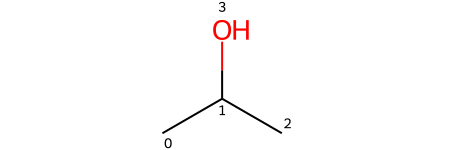

In [10]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
mol

In [11]:
#https://github.com/NREL/nfp/blob/master/nfp/preprocessing/features.py
from rdkit import Chem
def atom_features_v1(atom):
    """ Return an integer hash representing the atom type
    """

    return str((
        atom.GetSymbol(),
        atom.GetDegree(),
        atom.GetTotalNumHs(),
        atom.GetImplicitValence(),
        atom.GetIsAromatic(),
    ))


def atom_features_v2(atom):
    props = ['GetChiralTag', 'GetDegree', 'GetExplicitValence',
             'GetFormalCharge', 'GetHybridization', 'GetImplicitValence',
             'GetIsAromatic', 'GetNoImplicit', 'GetNumExplicitHs',
             'GetNumImplicitHs', 'GetNumRadicalElectrons', 'GetSymbol',
             'GetTotalDegree', 'GetTotalNumHs', 'GetTotalValence']

    atom_type = [getattr(atom, prop)() for prop in props]

    return str(tuple(atom_type))

def bond_features_v1(bond, **kwargs):
    """ Return an integer hash representing the bond type.
    
    flipped : bool
        Only valid for 'v3' version, whether to swap the begin and end atom types
    """

    return str((
        bond.GetBondType(),
        bond.GetIsConjugated(),
        bond.IsInRing(),
        sorted([
            bond.GetBeginAtom().GetSymbol(),
            bond.GetEndAtom().GetSymbol()]),
    ))


mol = Chem.MolFromSmiles('CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O')

for atom in mol.GetAtoms():
    print(atom_features_v1(atom))
    #print(atom_features_v2(atom))

for bond in mol.GetBonds():
    print(bond_features_v1(bond))

('C', 1, 3, 3, False)
('N', 3, 0, 0, False)
('C', 2, 2, 2, False)
('C', 2, 2, 2, False)
('C', 4, 0, 0, False)
('C', 3, 1, 1, False)
('C', 3, 1, 1, False)
('C', 2, 2, 2, False)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 3, 0, 0, True)
('C', 2, 1, 1, True)
('C', 2, 1, 1, True)
('O', 1, 1, 1, False)
('O', 2, 0, 0, False)
('C', 3, 1, 1, False)
('C', 3, 1, 1, False)
('C', 2, 1, 1, False)
('C', 2, 1, 1, False)
('O', 1, 1, 1, False)
(rdkit.Chem.rdchem.BondType.SINGLE, False, False, ['C', 'N'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'N'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.SINGLE, False, True, ['C', 'C'])
(rdkit.Chem.rdchem.BondType.AROMATIC, True, True, ['C',

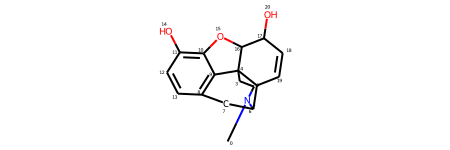

In [12]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
mol

In [13]:
from rdkit.Chem.rdMolDescriptors \
import CalcNumRings, CalcNumAromaticRings, CalcNumAliphaticRings

print(CalcNumRings(mol), CalcNumAromaticRings(mol), CalcNumAliphaticRings(mol))

SSSR = Chem.GetSymmSSSR(mol)
for sssr in SSSR:
    print(list(sssr))

5 1 4
[1, 6, 5, 4, 3, 2]
[7, 8, 9, 4, 5, 6]
[11, 12, 13, 8, 9, 10]
[15, 10, 9, 4, 16]
[17, 18, 19, 5, 4, 16]


# Assignment Week 4

One-hot encoding is one of the ways (not always the best way though) to vectorize the features that have different types (integer, float, boolean, etc.). 

(1) Write a function that takes (i) mol object, (ii) maximum number of atoms in a molecule, (iii) whether to consider explicit Hs (True or False) as input variables, and returns a list of one-hot vectors.

An one-hot vector per each atom should contain those atom features:

- If explicit_Hs = False (i.e. no AddHs) -> Symbols, Degrees, Total number of hydrogens bonded to an atom, IsInRing, IsAromatic

- If explicit_Hs = True -> Symbols(including H), Degrees, IsInRing, IsAromatic

- Zero vectors for (Max_atoms - # of atoms in a molecule) atoms

Regardless of # of atoms in a molecule, the shape of the return array should be: (Max_atoms, dimension of an one-hot vector)

(2) json-load './Week_3/exercise_2.json', and collect all the SMILES strings

(3) Apply the def written in (1) (Max_atoms = it can be determined from the largest molecule in the data file, explicit_Hs = True)

(4) How many unique atom types (i.e. one-hot vectors) in the data file?

In [14]:
def get_symbol_encoding(symbol):
    position = 0
    if symbol == 'C':
        position = 0
    elif symbol == 'H':
        position = 1
    elif symbol == 'O':
        position = 2
    else:
        position = 3
    return position
        


def one_hot_generator(molec, max_atoms, explicit_Hs: bool):
    one_hots = []
    if(explicit_Hs):
    #One hot encoding:
    #[Symbol, Degree, Num of Hs, In ring?, Aromatic?]
    #[C, H, O, N, 1, 2, 3, 4, 0, 1, 2, 3, 4, Yes, No, Yes, No]
        one_hot = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        molec = Chem.AddHs(molec)
        for index, atom in enumerate(molec.GetAtoms()):
            if(index <= max_atoms):
                symb = atom.GetSymbol()
                one_hot[get_symbol_encoding(symb)] = 1
                deg = atom.GetDegree()
                one_hot[3 + int(deg)] = 1
                tot_H_bonded = atom.GetTotalNumHs()
                one_hot[ + int(tot_H_bonded)] = 1
                if(atom.GetIsAromatic()):
                    one_hot[13] = 1
                #???Is in Ring requires using a bond object???
                one_hots.append(one_hot)
            
    else:
    #One hot encoding:
    #[Symbol, Degree, In ring?, Aromatic?]
    #[C, H, O, N, 1, 2, 3, 4, Yes, No, Yes, No]
        one_hot = [0,0,0,0,0,0,0,0,0,0,0,0]
        molec = Chem.AddHs(molec)
        for atom in molec.GetAtoms():
            if(index <= max):
                symb = atom.GetSymbol()
                one_hot[get_symbol_encoding(symb)] = 1
                tot_H_bonded = atom.GetTotalNumHs()
                one_hot[ + int(tot_H_bonded)] = 1
                if(atom.GetIsAromatic()):
                    tot_H_bonded[11] = 1
                #???Is in Ring requires using a bond object???
                #???Is in Ring requires using a bond object???
                one_hots.append(one_hot)


In [15]:
import json

target_smiles = []

with open('./../Week3/Week_3/stoich_dict.json', 'r') as f:
    caffeine_file = json.load(f)
    for key in caffeine_file.keys():
        target_smiles.append(caffeine_file[key])
                
atom_cutoff = 0
one_hot_list = []
    
for molec in target_smiles:
    max_atom = sum(atom.isalpha() for atom in molec)
    if max_atom > atom_cutoff:
        atom_cutoff = max_atom
    
    mol = Chem.MolFromSmiles(molec)
    if mol:
        one_hot_list.append(one_hot_generator(mol, atom_cutoff, True))
    
    
print(len(list(set(one_hot_list))))

RDKit ERROR: [15:52:57] Explicit valence for atom # 7 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 16 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 14 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 17 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 5 O, 3, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 12 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 20 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 9 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 8 O, 3, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 15 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for atom # 11 H, 2, is greater than permitted
RDKit ERROR: [15:52:57] Explicit valence for at

1


RDKit ERROR: [15:53:00] Explicit valence for atom # 20 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 16 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 13 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 9 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 8 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 20 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 14 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 16 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 13 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 13 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for atom # 10 H, 2, is greater than permitted
RDKit ERROR: [15:53:00] Explicit valence for 